(38, 38)


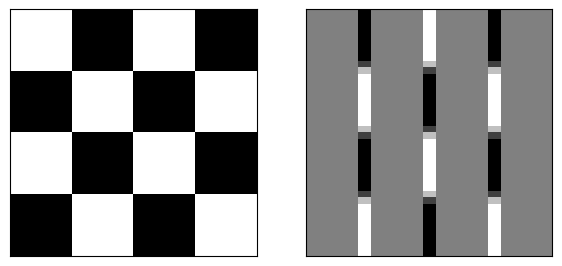

In [27]:
import numpy as np
import matplotlib.pyplot as plt

white_patch = 255 * np.ones(shape=(10, 10))
black_patch = 0 * np.ones(shape=(10, 10))

img1 = np.hstack([white_patch, black_patch])
img2 = np.hstack([black_patch, white_patch])
img = np.vstack([img1, img2])
img = np.tile(img, reps=[2, 2])

fig, axes = plt.subplots(1, 2, figsize=(7, 7))
axes[0].imshow(img, cmap='gray')
axes[0].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)


x_filter = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])
y_filter = np.array([[1, 2, 1],
                     [0, 0, 0,],
                     [-1, -2, -1]])

H, W = img.shape
F = x_filter.shape[0]
H_ = H - F + 1
W_ = W - F + 1

correlations = np.zeros(shape=(H_, W_))
for h_idx in range(H_):
    for w_idx in range(W_):
        window_mat = img[h_idx:h_idx + F, w_idx:w_idx + F]
        z = np.matmul(window_mat.flatten(), x_filter.flatten())
        correlations[h_idx, w_idx] = z
print(correlations.shape)
axes[1].imshow(correlations, cmap='gray')
axes[1].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

# filter_idx = np.arange(F**2).reshape(1, -1)
# window_idx = np.arange(H_*W_).reshape(-1, 1)
# idx_arr = filter_idx + window_idx
# print(filter_idx.shape)
# print(window_idx.shape)
# print(idx_arr.shape)

# window_mat = img[idx_arr.reshape(-1, F, F)]
# correlations = np.matmul(window_mat, x_filter)

# correlations = correlations.flatten()
# print(f"{correlations = }")
# axes[1].imshow(correlations, cmap='gray')
# axes[1].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

img.shape = (1280, 1280)


Text(0.5, 0, 'Filtered Image')

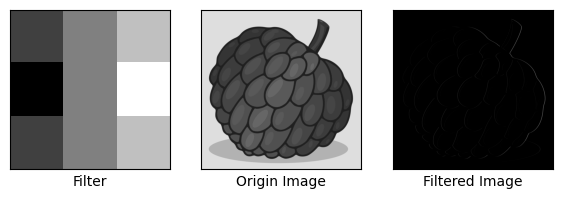

In [92]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
fig, axes = plt.subplots(1, 3, figsize=(7,7))

# filter
x_filter = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])
axes[0].imshow(x_filter, 'gray')
axes[0].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
axes[0].set_xlabel('Filter')


# img
img = Image.open('1124_sobel_filtering.png').convert('L')
img = np.array(img)
print(f'{img.shape = }')
axes[1].imshow(img, 'gray')
axes[1].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
axes[1].set_xlabel('Origin Image')


H, W = img.shape
F = x_filter.shape[0]
H_ = H - F + 1
W_ = W - F + 1


# filterd
correlations = np.zeros(shape=(H_, W_))
for h_idx in range(H_):
    for w_idx in range(W_):
        window_mat = img[h_idx:h_idx + F, w_idx:w_idx + F]
        z = np.matmul(window_mat.flatten(), x_filter.flatten())
        correlations[h_idx, w_idx] = z

axes[2].imshow(correlations, cmap='gray', vmin=np.average(correlations) ,vmax=np.max(correlations))
axes[2].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
axes[2].set_xlabel('Filtered Image')
